<a href="https://colab.research.google.com/github/Alfa4026/Case-Study-03-DataMining_Kelompok-J/blob/main/Study_Case_03_Group_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok J Study Case 3**
| Nama                 | NIM            |
| ------------------   | -------------- |
| Hoirotun Nisa'       | 11220940000003 |  
| Shafira Al Zuhra     | 11220940000018 |
| Alif Alamsyah        | 11220940000028 |
| Nadira Desriyani     | 11220940000071 |



# Loading Data

##  Install dan Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn.metrics import mean_squared_error

## Loading Data ASHRAE

In [2]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df2 = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df2 = pd.read_csv(file_)

print(df2.shape)
df2.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


## Statistika Dasar

In [4]:
df2.describe(include='all')

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,NaN,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,NaN,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,NaN,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433


# Preprosessing Data

## Mengoreksi Tipe Data

In [5]:
df2['primary_use'] = df2['primary_use'].astype('category')

In [6]:
# Misalkan df2 adalah DataFrame yang memiliki kolom 'primary_use'
# Contoh data kategorikal
cat_col = 'primary_use'

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Terapkan LabelEncoder langsung ke kolom 'primary_use' dan ubah nilainya
df2[cat_col] = encoder.fit_transform(df2[cat_col])

# Tampilkan hasil dengan penjelasan
print("Data setelah di-encode:")
print(df2[[cat_col]].head())  # Menampilkan kolom yang sudah di-encode

# Menampilkan keterangan label
print("\nKeterangan label:")
for i, class_name in enumerate(encoder.classes_):
    print(f"{i}: {class_name}")


Data setelah di-encode:
   primary_use
0            0
1            0
2            0
3            0
4            0

Keterangan label:
0: Education
1: Entertainment/public assembly
2: Food sales and service
3: Healthcare
4: Lodging/residential
5: Manufacturing/industrial
6: Office
7: Other
8: Parking
9: Public services
10: Religious worship
11: Retail
12: Services
13: Technology/science
14: Utility
15: Warehouse/storage


## Memeriksa Duplikasi pada Data

In [7]:
df2.duplicated().sum()

0

Tidak terdapat duplikasi pada dataset.

## Memeriksa Noise

In [8]:
# Menampilkan nilai unik setiap kolom
for col in df2.columns:
    print(f"Kolom '{col}' memiliki {df2[col].nunique()} nilai unik.")
    print(f"Nilai unik: {df2[col].unique()}")
    print("-" * 50)


Kolom 'meter_reading' memiliki 1413 nilai unik.
Nilai unik: [237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]
--------------------------------------------------
Kolom 'primary_use' memiliki 16 nilai unik.
Nilai unik: [ 0  4  6  1  7 11  8  9 15  2 10  3 14 13  5 12]
--------------------------------------------------
Kolom 'square_feet' memiliki 1362 nilai unik.
Nilai unik: [ 7432  2720  5376 ... 11265 29775 92271]
--------------------------------------------------
Kolom 'year_built' memiliki 115 nilai unik.
Nilai unik: [2008. 2004. 1991. 2002. 1975. 2000. 1981. 1989. 2003. 2010. 1968. 1999.
 2013. 1974. 1996. 1980. 1977. 1990. 1985. 2001. 1969. 2005. 2016. 2006.
 2014. 1970. 1971. 2011. 1997. 2007. 1998. 2009. 1979. 1986. 1982. 1983.
   nan 1913. 1953. 1909. 1958. 1960. 1976. 1906. 1900. 1995. 1956. 1930.
 1967. 1919. 1955. 1965. 1907. 2012. 1992. 1948. 1950. 1941. 1957. 1964.
 1940. 1951. 1966. 1934. 1959. 1993. 1939. 1918. 1963. 1987. 1914. 1973.
 1

## Memeriksa Outlier

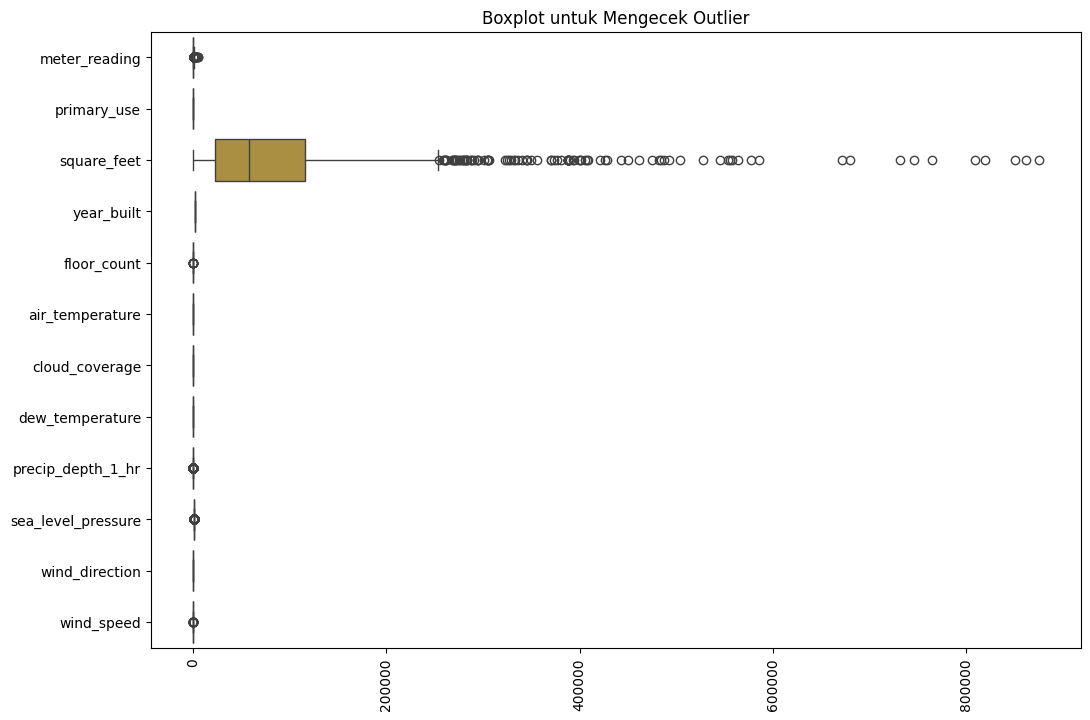

In [9]:
# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2, orient='h')
plt.title("Boxplot untuk Mengecek Outlier")
plt.xticks(rotation=90)  # Jika kolom terlalu banyak, memutar label sumbu x
plt.show()


Karena kami ingin menggunakan decision tree regression yang tahan terhadap outlier, maka kami tidak menghapus outlier tersebut.

## Memeriksa dan Menangani Missing Value

In [10]:
df2.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


In [11]:
# Misalnya, df adalah DataFrame Anda
missing_values = df2.isnull().sum()  # Menghitung jumlah missing value per kolom
missing_percentage = round((missing_values / len(df2)) * 100, 2)  # Menghitung persentase missing value

# Menampilkan hasilnya dalam bentuk DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
# missing_data = missing_data[missing_data['Missing Values'] > 0]  # Menyaring kolom yang memiliki missing value
missing_data

,Missing Values,Percentage
meter_reading,0,0.00
primary_use,0,0.00
square_feet,0,0.00
year_built,750,53.08
floor_count,1061,75.09
air_temperature,0,0.00
cloud_coverage,17,1.20
dew_temperature,0,0.00
precip_depth_1_hr,176,12.46
sea_level_pressure,89,6.30


In [12]:
# Salin data awal
df2 = df2.copy()

# 1. Drop kolom dengan missing value lebih dari 50%
threshold = 0.5  # Ambang batas 50%
missing_percentage = df2.isna().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df2_cleaned = df2.drop(columns=columns_to_drop)

print("Kolom yang di-drop:", list(columns_to_drop))

# 2. Lakukan interpolasi pada kolom numerik yang tersisa
cols_to_interpolate = df2_cleaned.select_dtypes(include=['float64', 'int64']).columns  # Hanya kolom numerik
df2_cleaned[cols_to_interpolate] = df2_cleaned[cols_to_interpolate].interpolate(
    method='linear',  # Interpolasi linear
    axis=0            # Berdasarkan indeks
)


Kolom yang di-drop: ['year_built', 'floor_count']


kode di atas merupakan langkah penanganan missing value dengan menghapus 2 variabel yang memuat missing value lebih dari 50% yaitu **year_built** dan **floor_count**. Sedangkan pada variabel lainnya yang memiliki missing value kurang dari 50% yaitu **cloud_coverage, precip_depth_1_hr, dan sea_level_pressure** ditangani dengan imputasi menggunakan teknik interpolasi linear.

In [13]:
print(df2_cleaned.isna().sum())

meter_reading         0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64


# Visualisasi Data

Hubungan Air Temperature dan Meter Reading

<ipython-input-14-ca8698792ce0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_meter_avg = df2.groupby('temp_bins')['meter_reading'].mean().reset_index()
<ipython-input-14-ca8698792ce0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_bins', y='meter_reading', data=temp_meter_avg, palette='viridis')


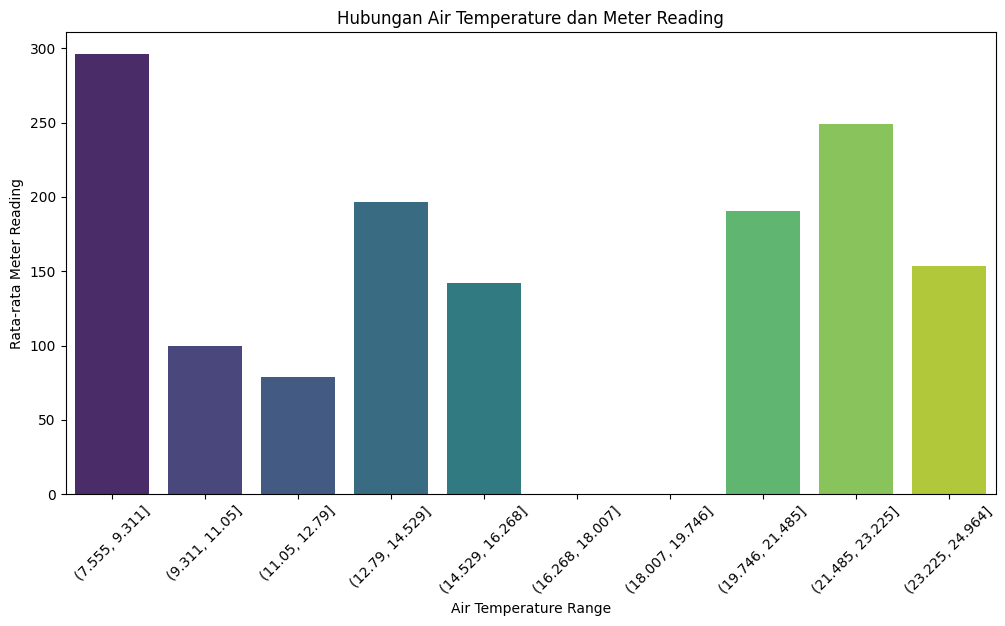

In [14]:
df2['temp_bins'] = pd.cut(df2['air_temperature'], bins=10)  # Membagi menjadi 10 kelompok

# Menghitung rata-rata meter_reading untuk setiap kategori suhu
temp_meter_avg = df2.groupby('temp_bins')['meter_reading'].mean().reset_index()

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='temp_bins', y='meter_reading', data=temp_meter_avg, palette='viridis')
plt.title('Hubungan Air Temperature dan Meter Reading')
plt.xlabel('Air Temperature Range')
plt.ylabel('Rata-rata Meter Reading')
plt.xticks(rotation=45)
plt.show()

Bangunan menggunakan lebih banyak energi saat suhu sangat dingin atau sangat panas, karena kebutuhan pemanas dan pendingin meningkat.

Melakukan hemat energi, seperti insulasi yang baik atau ventilasi alami, bisa membantu mengurangi penggunaan energi

Hubungan Square Feet dan Meter Reading

<ipython-input-15-67980d88c389>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  square_feet_avg = df2.groupby('square_feet_bins')['meter_reading'].mean().reset_index()
<ipython-input-15-67980d88c389>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='square_feet_bins', y='meter_reading', data=square_feet_avg, palette='viridis')


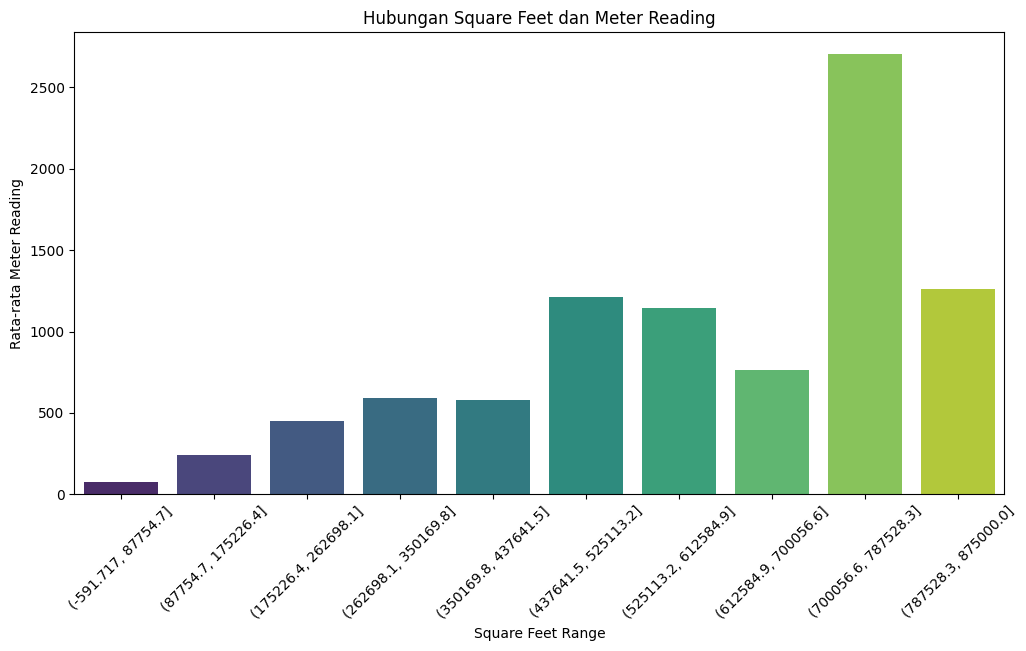

In [15]:
# Membagi square_feet menjadi beberapa kategori/range
df2['square_feet_bins'] = pd.cut(df2['square_feet'], bins=10)

# Menghitung rata-rata meter reading untuk setiap kategori
square_feet_avg = df2.groupby('square_feet_bins')['meter_reading'].mean().reset_index()

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='square_feet_bins', y='meter_reading', data=square_feet_avg, palette='viridis')
plt.title("Hubungan Square Feet dan Meter Reading")
plt.xlabel("Square Feet Range")
plt.ylabel("Rata-rata Meter Reading")
plt.xticks(rotation=45)
plt.show()




Bangunan dengan ukuran sedang (437,000 - 525,000 square feet) cenderung mengonsumsi energi lebih banyak, sementara bangunan sangat besar (lebih dari 700,000 square feet) justru lebih efisien. Ini menunjukkan bahwa desain dan teknologi bangunan besar mungkin lebih efisien dalam penggunaan energi.


Pengaruh dew temperature dan  wind speed terhadap meter reading

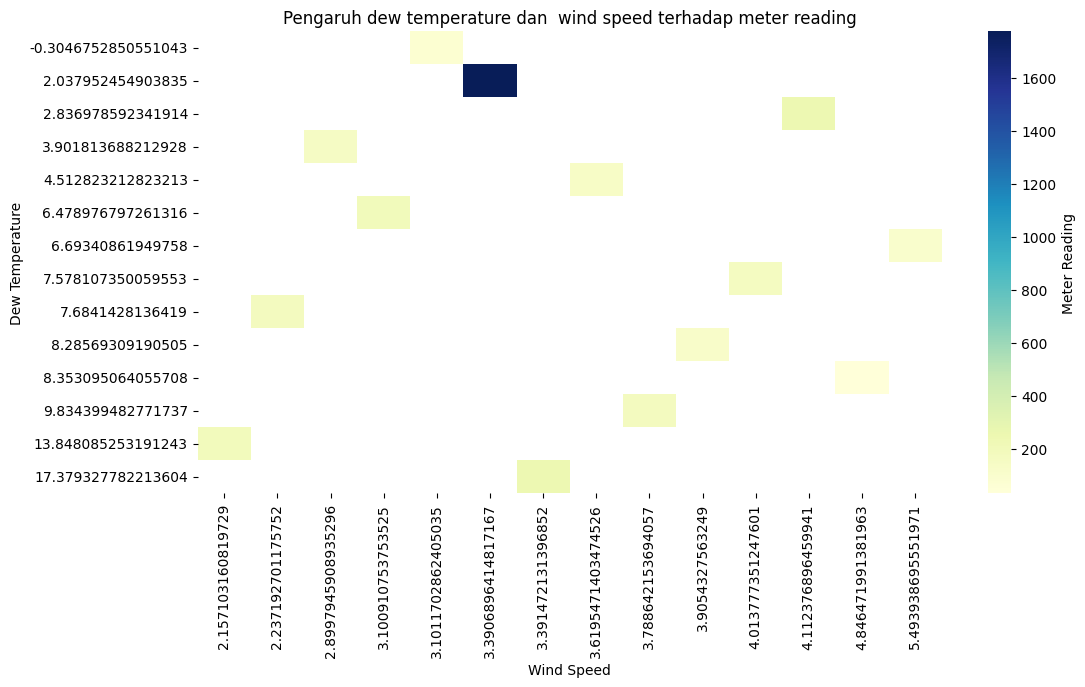

In [16]:
# Buat pivot table untuk heatmap
pivot_table = df2.pivot_table(
    index='dew_temperature',
    columns='wind_speed',
    values='meter_reading',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Meter Reading'})
plt.title("Pengaruh dew temperature dan  wind speed terhadap meter reading")
plt.xlabel("Wind Speed")
plt.ylabel("Dew Temperature")
plt.show()


Penggunaan energi  paling tinggi terjadi saat suhu embun berada di kisaran 7–8°C dan kecepatan angin sekitar 3.9–4.1 m/s, sementara pada suhu embun yang sangat rendah atau tinggi, serta kecepatan angin rendah, penggunaan energi cenderung lebih kecil.

Pengaruh Air Temperature dan Square Feet terhadap Meter Reading

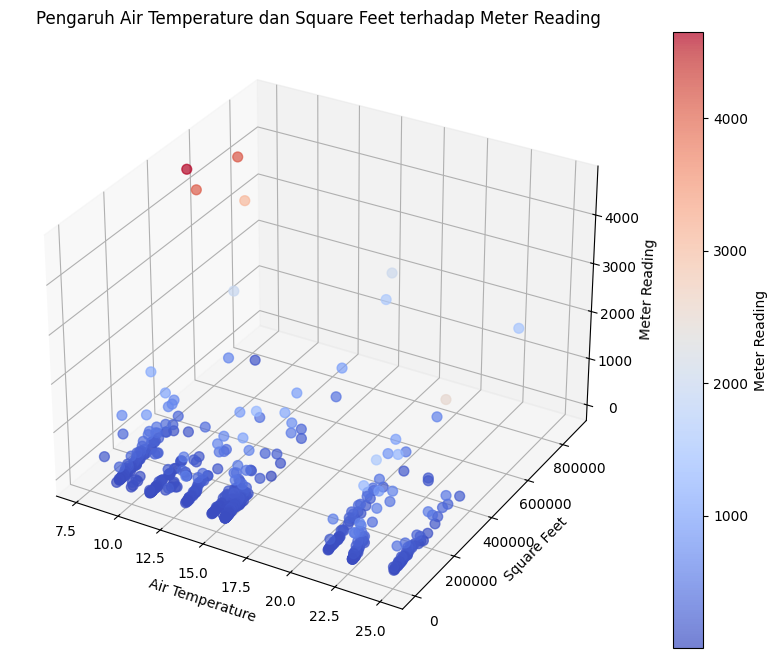

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Subset data untuk menghindari kepadatan visual
sample_df = df2.sample(500)

sc = ax.scatter(
    sample_df['air_temperature'],
    sample_df['square_feet'],
    sample_df['meter_reading'],
    c=sample_df['meter_reading'],
    cmap='coolwarm',
    s=50, alpha=0.7
)

ax.set_title('Pengaruh Air Temperature dan Square Feet terhadap Meter Reading')
ax.set_xlabel('Air Temperature')
ax.set_ylabel('Square Feet')
ax.set_zlabel('Meter Reading')
fig.colorbar(sc, label='Meter Reading')
plt.show()


Meter reading yang sangat tinggi (di atas 3000) terjadi pada kombinasi luas bangunan besar (di atas 600.000 square feet) dan suhu udara sedang (sekitar 20°C). Sebaliknya, pada bangunan dengan luas lebih kecil, pembacaan meter tetap rendah meskipun suhu meningkat.

## Transformasi Variabel Target

Skewness: 6.545827017861556


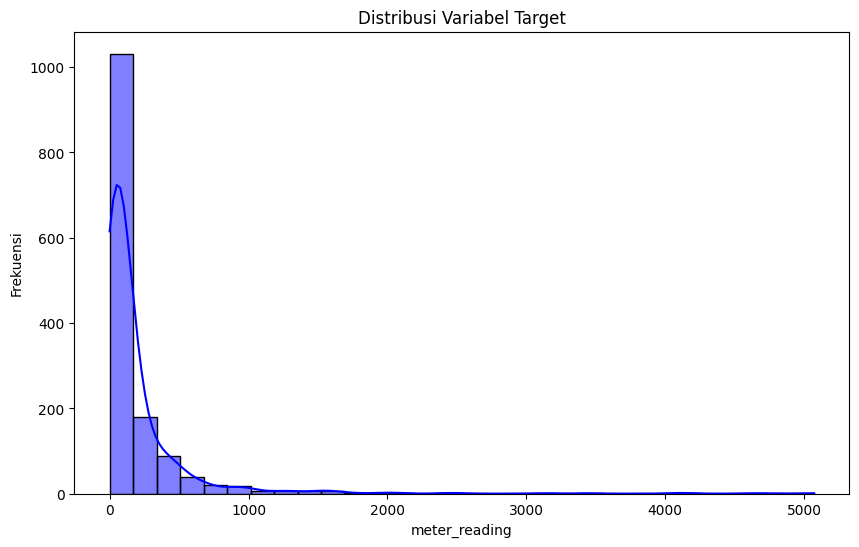

In [18]:
# Menghitung skewness
skewness_value = skew(df2_cleaned['meter_reading'], nan_policy='omit')
print(f"Skewness: {skewness_value}")

# Plot distribusi variabel target
plt.figure(figsize=(10, 6))
sns.histplot(df2_cleaned['meter_reading'], kde=True, bins=30, color='blue')
plt.title('Distribusi Variabel Target')
plt.xlabel('meter_reading')
plt.ylabel('Frekuensi')
plt.show()

Terlihat pada grafik bahwa skew condong ke kanan yang artinya skew positif sangat kuat pada variabel meter reading, untuk menagani lebih lanjut dan penangannnya kita mempertimbangkan dengan menggunakan transformasi data, yaitu log transformation

In [19]:
# Transformasi log pada target (langsung mengganti kolom 'meter_reading' di df2_cleaned)
df2_cleaned['meter_reading'] = np.log1p(df2_cleaned['meter_reading'])  # log1p untuk menangani nilai 0


Skewness: -0.1603538839405275


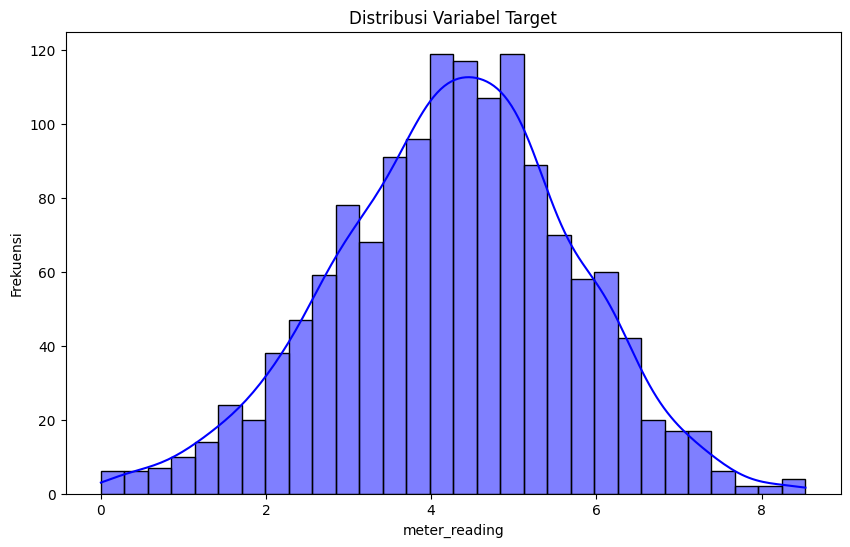

In [20]:
# Menghitung skewness
skewness_value = skew(df2_cleaned['meter_reading'], nan_policy='omit')
print(f"Skewness: {skewness_value}")

# Plot distribusi variabel target
plt.figure(figsize=(10, 6))
sns.histplot(df2_cleaned['meter_reading'], kde=True, bins=30, color='blue')
plt.title('Distribusi Variabel Target')
plt.xlabel('meter_reading')
plt.ylabel('Frekuensi')
plt.show()


Setelah dilakukan transformasi data dengan log terlihat jelas pada grafik bahwa variable meter_reading lebih mendekati distribusi normal. Frekuensi tertinggi ada di sekitar nilai tengah (4-5), ini menunjukkan bahwa nilai tersebut paling umum dalam dataset.

# Pemodelan

In [21]:
# 1. Tentukan fitur (X) dan target (y)
# Misalkan 'meter_reading' adalah target
X = df2_cleaned.drop(columns=['meter_reading'])  # Fitur
y = df2_cleaned['meter_reading']  # Target

# 2. Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # Data yang akan dibagi
    test_size=0.2,       # 20% untuk testing, 80% untuk training
    random_state=42,     # Agar hasil pembagian konsisten
    stratify=None        # Gunakan stratify jika target tidak balance (opsional)
)

# 3. Verifikasi hasil
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data training: (1130, 9)
Ukuran data testing: (283, 9)


## Hyperparameter Tuning

In [22]:
# Definisikan parameter grid untuk GridSearchCV
parameters = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV dengan DecisionTreeRegressor
decission_tree = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),  # Tambahkan random_state untuk hasil yang konsisten
    param_grid=parameters,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Latih GridSearchCV pada data training
decission_tree.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Best Parameters:", decission_tree.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


Model dengan parameter terbaik (max_depth: 5, min_samples_leaf: 4, dan min_samples_split: 10) bertujuan untuk menghindari overfitting, sehingga model dapat menghasilkan prediksi yang lebih baik pada data yang belum pernah dilihat (generalisasi).

##Estimator Decision Tree Terbaik

In [23]:
# Gunakan parameter terbaik untuk melatih ulang model final
best_params = decission_tree.best_params_  # Simpan parameter terbaik
dt_model = DecisionTreeRegressor(random_state=42, **best_params)  # Inisialisasi dengan parameter terbaik
dt_model.fit(X_train, y_train)  # Latih ulang model final

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

##Evaluasi Model Decision Tree pada Data Training dan Testing

In [24]:
# Evaluasi pada data training
y_train_pred = dt_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluasi pada data testing
y_test_pred = dt_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Cetak hasil
print(f"Training Set - MSE: {mse_train}, R²: {r2_train}")
print(f"Testing Set  - MSE: {mse_test}, R²: {r2_test}")
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training Set - MSE: 0.6477029849462294, R²: 0.6808492548997142
Testing Set  - MSE: 0.5945450281406547, R²: 0.7347358588272326
Training RMSE: 0.804799965796613
Testing RMSE: 0.7710674601749543


Terlihat pada output diatas, kinerja modelmemiliki performa yang stabil di training dan testing set, dengan MSE, RMSE, dan R² yang konsisten.
MSE untuk testing set (0.5945) sedikit lebih kecil dibandingkan training set (0.6477), menunjukkan bahwa model generalisasi dengan baik. RMSE antara training (0.8048) dan testing (0.7711) cukup kecil, menunjukkan bahwa model tidak mengalami overfitting secara signifikan. R² antara train (0.6808) dan test
(0.7347), menunjukkan model lebih baik dalam menjelaskan variansi data.


##Menampilkan Fitur-Fitur Penting Berdasarkan Model Decision Tree

In [25]:
# Fitur penting
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)


              Feature  Importance
1         square_feet    0.845878
4     dew_temperature    0.066722
0         primary_use    0.020346
6  sea_level_pressure    0.019231
5   precip_depth_1_hr    0.019097
2     air_temperature    0.018171
7      wind_direction    0.010555
3      cloud_coverage    0.000000
8          wind_speed    0.000000


Interpretasi dari output di atas kami sajikan pada bagian overview.

##Perbandingan Prediksi dan Nilai Sebenarnya dengan Line Plot

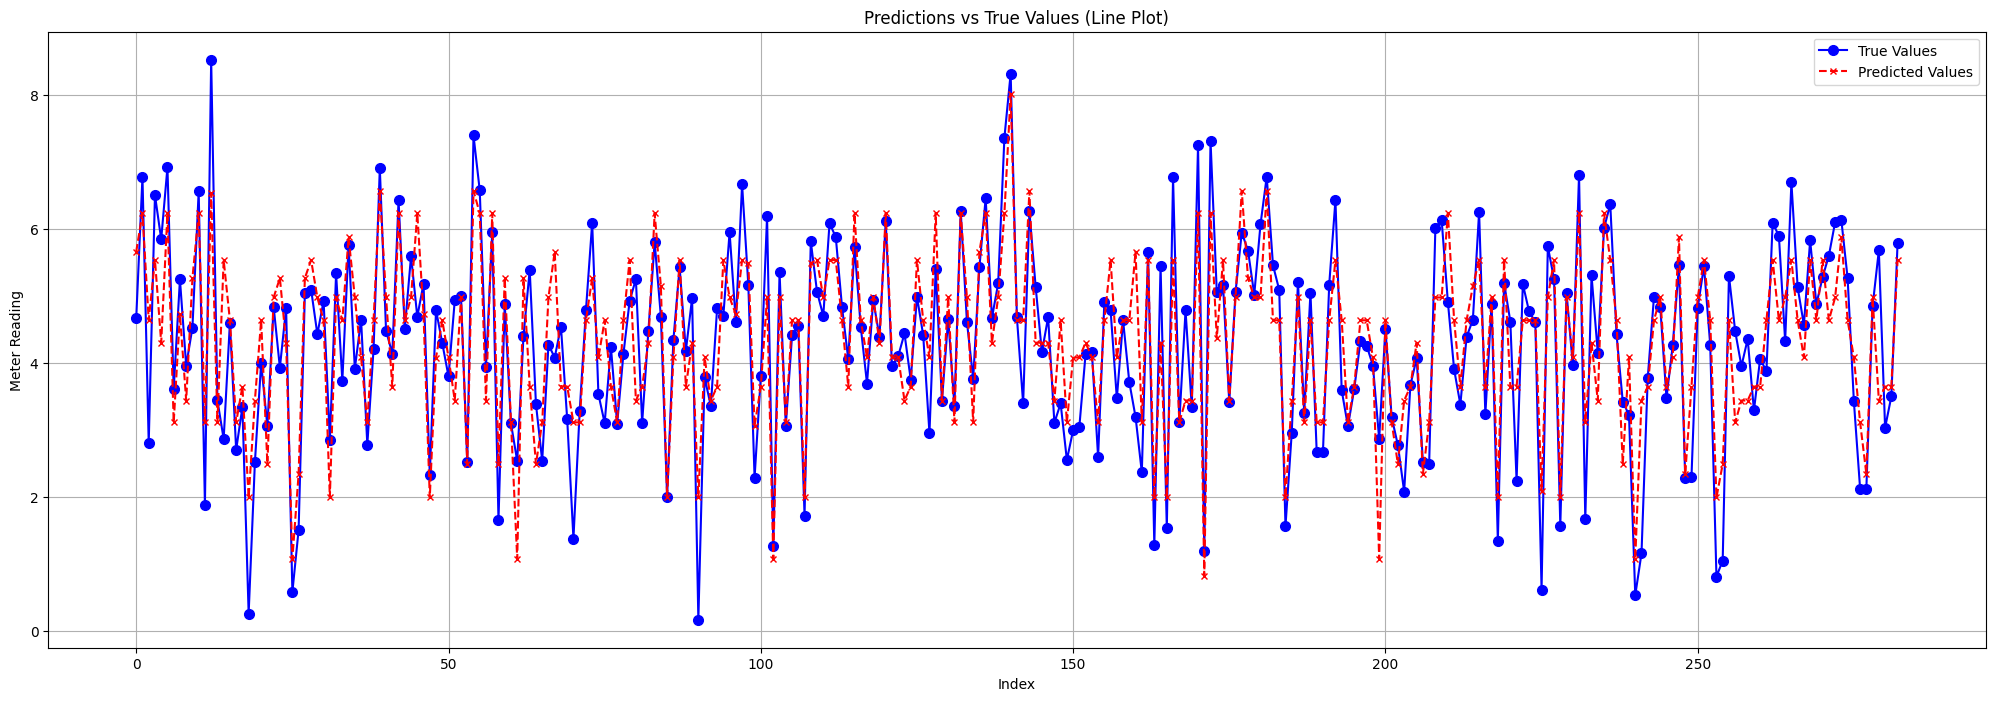

In [26]:
# Prediksi pada data uji
y_pred = dt_model.predict(X_test)

# Grafik Line Plot Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(25, 8))
plt.plot(y_test.values, label='True Values', color='blue', marker='o', linestyle='-', markersize=7)
plt.plot(y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', markersize=5)

# Menambahkan label dan judul
plt.xlabel("Index")
plt.ylabel("Meter Reading")
plt.title("Predictions vs True Values (Line Plot)")
plt.legend()
plt.grid(True)
plt.show()

Terlihat pada grafik bahwa model cukup baik dalam memprediksi data tetapi ada area tertentu dengan kesalahan signifikan. kita akan menggunakan metrik seperti MSE untuk mengukur kinerja yang lebih baik

## Evaluasi Model dengan Cross-Validation Menggunakan MSE

In [27]:
cross_val_scores = cross_val_score(decission_tree.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Mengubah nilai negatif ke positif
average_mse = -cross_val_scores.mean()
print(f"Average Cross-Validation MSE: {average_mse}")


Average Cross-Validation MSE: 0.8091948361211984


In [28]:
# Model Baseline (Mean Model)
mean_value = y_train.mean()
baseline_predictions = np.full_like(y_test, mean_value)

# Menghitung MSE untuk baseline

baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f"Baseline Model MSE: {baseline_mse}")

Baseline Model MSE: 2.2421588169903903


Model Decision Tree (MSE 0.8092) jauh lebih baik dibandingkan model baseline (MSE 2.2422). Ini menunjukkan bahwa model Decision Tree mampu memprediksi dengan lebih akurat daripada hanya menggunakan rata-rata sebagai prediksi.

# Overview

###### **Insight:**

1. **Ukuran bangunan (Square feet) merupakan prediktor utama meter reading (Konsumsi energi)**

  Hasil analisis diatas menunjukan bahwa square_feet memiliki pengaruh besar dengan presentasi 84,5% terhadap meter reading, ini artinya bangunan besar harus menjadi prioritas utama dalam pengelolaan energi.

2. **Dampak dew temperature (kelembapan udara) terhadap meter reading (Konsumsi energi)**

  Kelembapan udara(dew temperture) memiliki pengaruh sebesar 6,67%, ini menunjukan bahwa kelembapan dapat meningkkatkan kebutuhan energi dibanding suhu udara (air temperature) atau variable cuaca lainnya. Bangunan yang memiliki kelembapan tinggi biasanya memerlukann desain dan pengaturan pemanas, ventilasi, dan pendingin yang lebih baik

3. **Variasi berdasarkan jenis penggunaan bangunan (Primary use)**

  Meskipun kontribusinya rendah yaitu 2,03%, tetapi primary use berpengaruh pada meter reading. Contohnya: Sekolah/kampus memiliki pengaruh penggunaan bangunan lebih tinggi pada siang hari

4. **Pengaruh Arah Angin lebih signifikan daripada Kecepatan Angin**

  Terlihat pada output bahwa Wind_direction (1,05%) memiliki pengaruh terhadap konsumsi energi, sementara wind_speed (0%) tidak memberikan kontribusi langsung. Ini menunjukan bahwa Arah Angin dapat memengaruhi distribusi panas dan ventilasi alami dalam bangunan.

5. **Variabel Cuaca lainnya tidak berarti**

  Terlihat pada tabel bahwa Cloud_coverage (0%) dan wind_speed(0%), ini artinya faktor cuaca tertentu mungkin terlalu kecil untuk dipertimbangkan dalam pengelolaan energi atau pengaruhnya dapat diabaikan pada skala bangunan.

##### **Rekomendasi:**
1. **Memprioritaskan Efisiensi Energi di Bangunan yang Besar**

  Artinya, kita perlu memfokuskan pengunaan teknologi hemat energi untuk bangunan yang luasnya lebih besar. Dan juga, kita perlu memanfaatkan energi terbaru, seperti panel surya, pada bangunan besar untuk mengurangi ketergantungan pada energi listrik

2. **Desain dan pengaturan HVAC lebih disesuaikan terhadap kelembapan**

  Kita perlu berinvesstasi dalam teknologi pengontrol kelembapan agar dapat mengurangi konsumsi energi

3. **Pengelolaan energi berdasarkan aktivitas**

  Untuk bangunan dengan penggunaan utama seperti sekolah/kampus, yang cenderung memiliki aktivitas lebih tinggi pada siang hari, dapat diterapkan strategi manajemen energi berbasis waktu. Dan juga, perlunya memberikan edukasi penghuni dan penggunaan bangunan mengenai efisiensi energi berdasarkan kebutuhan spesifik bangunan (misalnya perilaku hemat energi di sekolah/kampus).

4. **Optimalkan desain ventilasi alami dan pemanasan yang lebih baik** dengan mempertimbangkan arah angin, seperti mengatur posisi ventilasi atau jendela yang lebih efektif untuk aliran udara berdasarkan arah angin dominan.

5. **Penerapan sistem pengelolaan air yang efisien** di bangunan besar sangat penting untuk mendukung efisiensi energi. Sistem pengumpulan air hujan dapat digunakan untuk kebutuhan non-konsumsi seperti penyiraman taman atau sistem pendinginan. Selain itu, sistem daur ulang air untuk toilet atau pemanasan air dapat mengurangi konsumsi energi yang dibutuhkan untuk pengolahan air, sehingga meningkatkan efisiensi keseluruhan bangunan.

6. **Penggunaan teknologi hemat energi** seperti smart plugs dan smart meters, dapat membantu memantau dan mengoptimalkan penggunaan perangkat elektronik di bangunan besar. Teknologi ini memastikan perangkat hanya menggunakan energi sesuai kebutuhan, mencegah pemborosan energi.

---